In [1]:
import pandas as pd

In [11]:
df=pd.read_csv('police.csv')

In [4]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [13]:
df=df.drop(columns=["county_name","search_type"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   driver_gender       86406 non-null  object 
 3   driver_age_raw      86414 non-null  float64
 4   driver_age          86120 non-null  float64
 5   driver_race         86408 non-null  object 
 6   violation_raw       86408 non-null  object 
 7   violation           86408 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   stop_outcome        86408 non-null  object 
 10  is_arrested         86408 non-null  object 
 11  stop_duration       86408 non-null  object 
 12  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(2), object(9)
memory usage: 7.9+ MB


In [16]:
new_data=df
mean_driver_age_raw=new_data["driver_age_raw"].mean()
mean_driver_age=new_data["driver_age"].mean()
new_data["driver_age_raw"].fillna(mean_driver_age_raw,inplace=True)
new_data["driver_age"].fillna(mean_driver_age,inplace=True)
new_data.fillna(method='bfill',inplace=True)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   driver_gender       91741 non-null  object 
 3   driver_age_raw      91741 non-null  float64
 4   driver_age          91741 non-null  float64
 5   driver_race         91741 non-null  object 
 6   violation_raw       91741 non-null  object 
 7   violation           91741 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   stop_outcome        91741 non-null  object 
 10  is_arrested         91741 non-null  bool   
 11  stop_duration       91741 non-null  object 
 12  drugs_related_stop  91741 non-null  bool   
dtypes: bool(3), float64(2), object(8)
memory usage: 7.3+ MB


In [19]:
new_data.duplicated().sum()

478

In [20]:
new_data.drop_duplicates(inplace=True)

In [21]:
new_data.duplicated().sum()

0

In [22]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91263 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91263 non-null  object 
 1   stop_time           91263 non-null  object 
 2   driver_gender       91263 non-null  object 
 3   driver_age_raw      91263 non-null  float64
 4   driver_age          91263 non-null  float64
 5   driver_race         91263 non-null  object 
 6   violation_raw       91263 non-null  object 
 7   violation           91263 non-null  object 
 8   search_conducted    91263 non-null  bool   
 9   stop_outcome        91263 non-null  object 
 10  is_arrested         91263 non-null  bool   
 11  stop_duration       91263 non-null  object 
 12  drugs_related_stop  91263 non-null  bool   
dtypes: bool(3), float64(2), object(8)
memory usage: 7.9+ MB


In [23]:
new_data["stop_date"]=pd.to_datetime(new_data["stop_date"])


In [24]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91263 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           91263 non-null  datetime64[ns]
 1   stop_time           91263 non-null  object        
 2   driver_gender       91263 non-null  object        
 3   driver_age_raw      91263 non-null  float64       
 4   driver_age          91263 non-null  float64       
 5   driver_race         91263 non-null  object        
 6   violation_raw       91263 non-null  object        
 7   violation           91263 non-null  object        
 8   search_conducted    91263 non-null  bool          
 9   stop_outcome        91263 non-null  object        
 10  is_arrested         91263 non-null  bool          
 11  stop_duration       91263 non-null  object        
 12  drugs_related_stop  91263 non-null  bool          
dtypes: bool(3), datetime64[ns](1), float64(2), obj

In [25]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91263 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           91263 non-null  datetime64[ns]
 1   stop_time           91263 non-null  object        
 2   driver_gender       91263 non-null  object        
 3   driver_age_raw      91263 non-null  float64       
 4   driver_age          91263 non-null  float64       
 5   driver_race         91263 non-null  object        
 6   violation_raw       91263 non-null  object        
 7   violation           91263 non-null  object        
 8   search_conducted    91263 non-null  bool          
 9   stop_outcome        91263 non-null  object        
 10  is_arrested         91263 non-null  bool          
 11  stop_duration       91263 non-null  object        
 12  drugs_related_stop  91263 non-null  bool          
dtypes: bool(3), datetime64[ns](1), float64(2), obj

In [32]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


<Axes: xlabel='drugs_related_stop', ylabel='driver_age'>

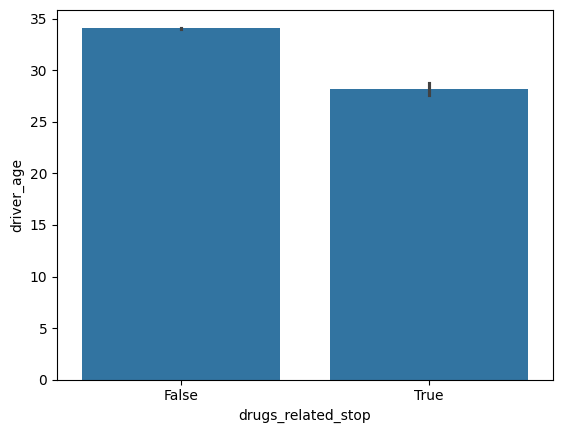

In [28]:
import seaborn as sns
sns.barplot(x='drugs_related_stop',y='driver_age',data=new_data)

<Axes: xlabel='is_arrested', ylabel='driver_age'>

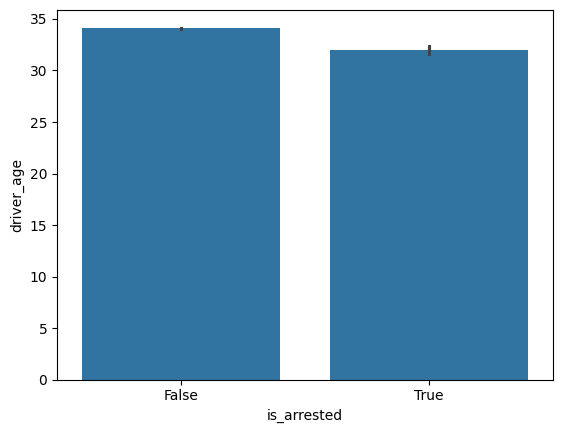

In [29]:
import seaborn as sns
sns.barplot(x='is_arrested',y='driver_age',data=new_data)

C:\Users\original\AppData\Local\Temp\ipykernel_15236\2908442293.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='drugs_related_stop',y='driver_age',hue='driver_gender',ci=None,data=new_data)


<Axes: xlabel='drugs_related_stop', ylabel='driver_age'>

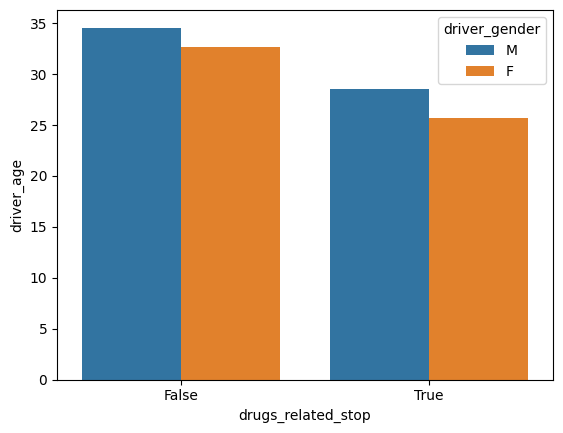

In [31]:
sns.barplot(x='drugs_related_stop',y='driver_age',hue='driver_gender',ci=None,data=new_data)

C:\Users\original\AppData\Local\Temp\ipykernel_15236\382422879.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_arrested',y='driver_age',hue='driver_gender',ci=None,data=new_data)


<Axes: xlabel='is_arrested', ylabel='driver_age'>

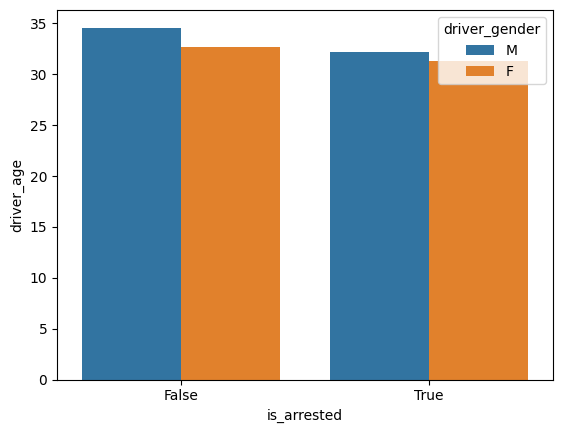

In [33]:
sns.barplot(x='is_arrested',y='driver_age',hue='driver_gender',ci=None,data=new_data)

<Axes: xlabel='stop_date', ylabel='Count'>

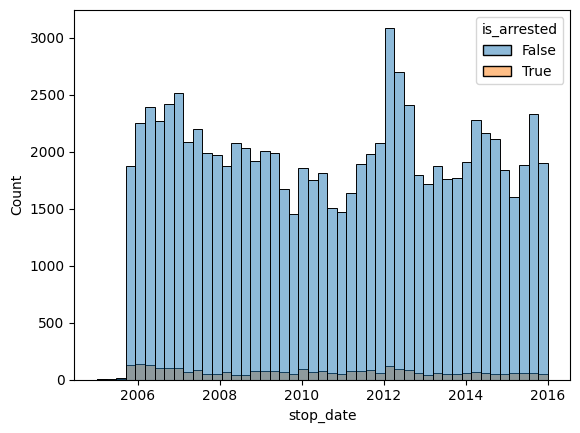

In [36]:
sns.histplot(x='stop_date',hue='is_arrested',data=new_data)

<Axes: xlabel='stop_duration', ylabel='Count'>

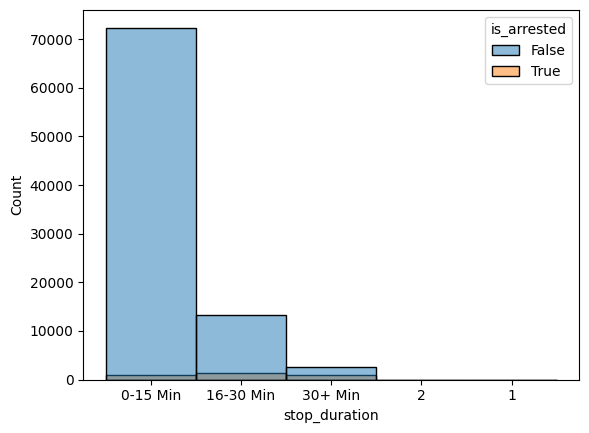

In [37]:
sns.histplot(x='stop_duration',hue='is_arrested',data=new_data)

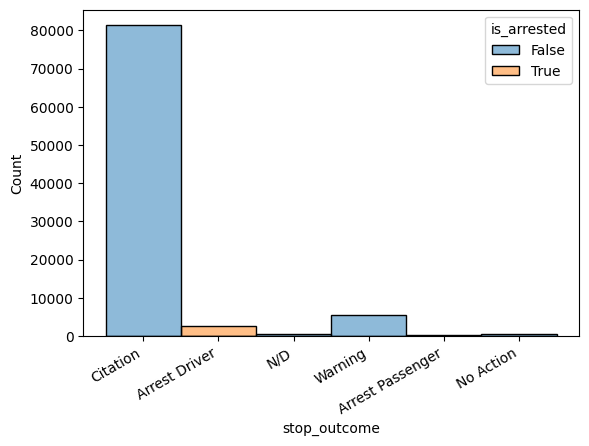

In [43]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
sns.histplot(x='stop_outcome',hue='is_arrested',data=new_data)
fig.autofmt_xdate()

<Axes: >

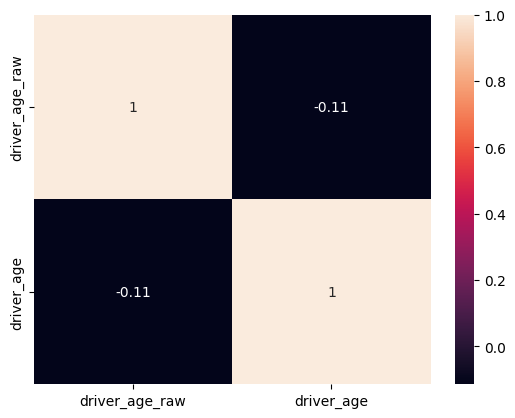

In [44]:
#Heatmap Example 1


corr=new_data.select_dtypes(include='number').corr()
sns.heatmap(corr,annot=True)